# Download and EDA

## Environment setup

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#WORKING_PATH = '/content/drive/MyDrive/KeepCoding/NLP/exercise'


In [ ]:
#%cd {WORKING_PATH}

/content/drive/MyDrive/KeepCoding/NLP/exercise


In [ ]:
#!pip install -r requirements.txt

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from gensim.models import Word2Vec
from wordcloud import WordCloud, STOPWORDS
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import unicodedata
from num2words import num2words

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
## to load custom libraries
#sys.path.append(WORKING_PATH)

# load custom libraries

In [ ]:
# Read data
df = pd.read_json('reviews_Patio_Lawn_and_Garden_5.json', lines=True)
df.shape

(13272, 9)

## EDA

In [ ]:
# Explore dataframe
df.head().T

,0,1,2,3,4
reviewerID,A1JZFGZEZVWQPY,A32JCI4AK2JTTG,A3N0P5AAMP6XD2,A2QK7UNJ857YG,AS0CYBAN6EM06
asin,B00002N674,B00002N674,B00002N674,B00002N674,B00002N674
reviewerName,"Carter H ""1amazonreviewer@gmail . com""","Darryl Bennett ""Fuzzy342""",H B,Jason,jimmy
helpful,"[4, 4]","[0, 0]","[2, 3]","[0, 0]","[1, 1]"
reviewText,Good USA company that stands behind their prod...,This is a high quality 8 ply hose. I have had ...,It's probably one of the best hoses I've ever ...,I probably should have bought something a bit ...,I bought three of these 5/8-inch Flexogen hose...
overall,4,5,4,5,5
summary,Great Hoses,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,Very satisfied!,Very high quality,Good Hoses
unixReviewTime,1308614400,1402272000,1336176000,1373846400,1375660800
reviewTime,"06 21, 2011","06 9, 2014","05 5, 2012","07 15, 2013","08 5, 2013"


In [1]:
# Select columns reviewText and overall
#df = df.loc[:10000, ['reviewText', 'overall']]
df = df.loc[:, ['reviewText', 'overall']]
df.shape

NameError: name 'df' is not defined

In [ ]:
# Type of columns and NAs checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  10001 non-null  object
 1   overall     10001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


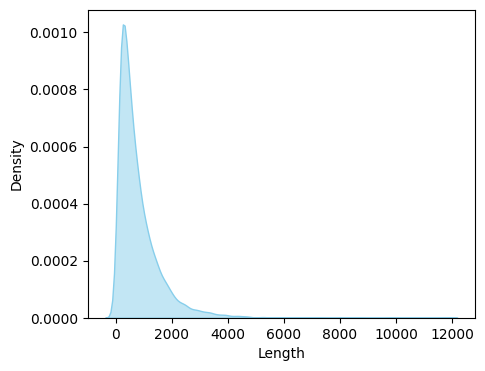

,lengthText
count,10001.000000
mean,801.612939
std,794.673680
min,0.000000
25%,284.000000
50%,551.000000
75%,1047.000000
max,11816.000000


In [ ]:
# Distribution for text size
plt.figure(figsize=(5,4))
df['lengthText'] = df['reviewText'].apply(len)
sns.kdeplot(df['lengthText'], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Density')
plt.show()
df['lengthText'].describe()

In [ ]:
# Remove entries without text
print(f'Found {sum(df["lengthText"] == 0)} entries without text')

df = df[df['lengthText'] != 0]

Found 11 entries without text


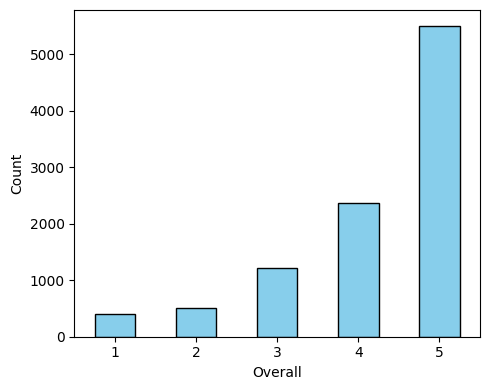

,count
overall,
5,5504
4,2369
3,1212
2,504
1,401


In [ ]:
# Distribution overall
plt.figure(figsize=(5,4))
counts = df['overall'].value_counts()
counts = counts.loc[sorted(counts.index)]
# Plot value counts as bars
counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Customize
plt.xlabel('Overall')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  # Prevent label clipping
plt.show()
df['overall'].value_counts()

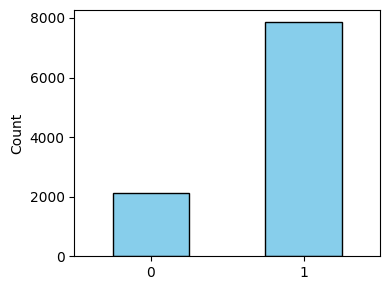

,count
sentiment,
1,7873
0,2117


In [ ]:
# Classify overall into negative sentiment (0) and positive sentiment (1)
df['sentiment'] = df['overall'].apply(lambda x: 0 if x < 4 else 1)

# Distribution
plt.figure(figsize=(4,3))
counts = df['sentiment'].value_counts()
counts = counts.loc[sorted(counts.index)]
# Plot value counts as bars
counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Customize
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  # Prevent label clipping
plt.show()
df['sentiment'].value_counts()


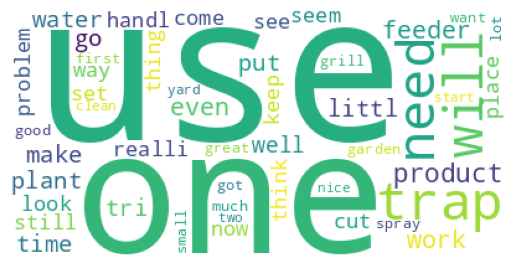


Vocabulary size before processing: 77172
Vocabulary size after processing: 15905

Top 10 most frequent unigrams
3971	time
4095	feeder
4095	well
4098	product
5520	will
5662	two
6141	work
6150	trap
9813	one
11700	use

Top 10 most frequent bigrams
457	peanut butter
508	bird feeder
513	easi use
515	one hundred
552	thousand and
593	work great
604	two hundred
847	thirty four
945	work well
1325	hundred and

Some examples

Having had a number of rotary and oscillating sprinklers that stopped working, I was attracted to this product because it has no moving parts to fail. So it works and keeps on working. The design is tried and true--my grandmother used a round variant of this sprinkler almost daily for many years decades ago.A couple of tips.  I take it off the hose and let the sprinkler dry when done, because the interior rusts (not sure the rust hurts anything).  Also, cast iron is somewhat brittle, so I don't let it fall on any hard surfaces--my grandmother knocked off a chunk of her spri

In [ ]:
# Normalize texts
# To lowercase
df['reviewTextProc'] = df['reviewText'].str.lower()
# Remove "strange" characters
df['reviewTextProc'] = df['reviewTextProc'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
# Remove punctuation. Only words, spaces and ' are kept. Keep ' is important for removing stopwords step.
df['reviewTextProc'] = df['reviewTextProc'].apply(lambda x: re.sub(r"[^a-z0-9']", ' ', x))
# Remove one letter words
df['reviewTextProc'] = df['reviewTextProc'].apply(lambda x: re.sub(r" [a-z] ", ' ', x))
# Remove stopwords
df['reviewTextProc'] = df['reviewTextProc'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS]))
# Remove punctuation. Remove '.
df['reviewTextProc'] = df['reviewTextProc'].apply(lambda x: re.sub(r"'", '', x))
# Stemming
stemmer = PorterStemmer()
df['reviewTextProc'] = df['reviewTextProc'].apply(lambda x: ' '.join([PorterStemmer().stem(w) for w in x.split()]))
# Transform numbers to words
df['reviewTextProc'] = df['reviewTextProc'].apply(lambda x: ' '.join([word if not word.isdigit() else num2words(word, ordinal=False) for word in x.split(' ')]))

# wordcloud
combined_text_proc = " ".join(df.loc[:, 'reviewTextProc'])
wc = WordCloud(background_color='white', max_words=50)

plt.imshow(wc.generate(combined_text_proc))
plt.axis('off')
plt.show()

# size vocabulary
combined_text = " ".join(df.loc[:, 'reviewText'])
list_words = combined_text.split()
unique_words = set(list_words)
print(f'\nVocabulary size before processing: {len(unique_words)}')
list_words = combined_text_proc.split()
unique_words = set(list_words)
print(f'Vocabulary size after processing: {len(unique_words)}')

# unigrams analysis
print('\nTop 10 most frequent unigrams')
countUni = CountVectorizer(ngram_range=(1, 1))
totalCountUni = countUni.fit_transform(df.loc[:,'reviewTextProc']).sum(axis=0)

top_indices = np.argsort(totalCountUni)[0, -10:][::-1].tolist()[0]
top_values = totalCountUni[0, top_indices].tolist()[0]

for idx, val in zip(top_indices, top_values):
    print(f"{val}\t{countUni.get_feature_names_out()[idx]}")

# bigrams analysis
print('\nTop 10 most frequent bigrams')
countBi = CountVectorizer(ngram_range=(2, 2))
totalCountBi = countBi.fit_transform(df.loc[:,'reviewTextProc']).sum(axis=0)

top_indices = np.argsort(totalCountBi)[0, -10:][::-1].tolist()[0]
top_values = totalCountBi[0, top_indices].tolist()[0]

for idx, val in zip(top_indices, top_values):
    print(f"{val}\t{countBi.get_feature_names_out()[idx]}")

# some examples
print('\nSome examples')
idx_examples = random.sample(df.index.tolist(),5)
for idx in idx_examples:
  print(f'\n{df.loc[idx, "reviewText"]}')
  print(df.loc[idx, 'reviewTextProc'])

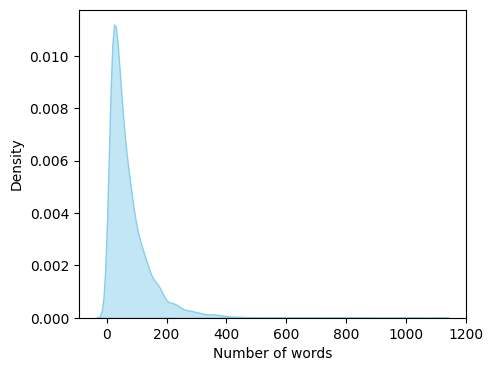

,numWords
count,9990.000000
mean,74.687187
std,75.027331
min,1.000000
25%,27.000000
50%,51.000000
75%,96.000000
max,1108.000000


In [ ]:
# Distribution of the number of words for each review
plt.figure(figsize=(5,4))
df['numWords'] = df['reviewTextProc'].apply(lambda x: len(x.split()))
sns.kdeplot(df['numWords'], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Number of words')
plt.ylabel('Density')
plt.show()
df['numWords'].describe()

In [ ]:
df[df['numWords'] == 1]

,reviewText,overall,lengthText,sentiment,reviewTextProc,numWords
71,GOOD,4,4,1,good,1
876,NICE,4,4,1,nice,1
4153,BROKE,2,5,0,broke,1
5979,Does the job.,3,13,0,job,1
8267,as described,5,12,1,describ,1
9693,PRETTY,4,6,1,pretti,1


In [ ]:
df[df['numWords'] > 1100]

,reviewText,overall,lengthText,sentiment,reviewTextProc,numWords
8391,For all of you who don't want to read all of m...,5,11816,1,want read discoveri learn experi conclus first...,1108


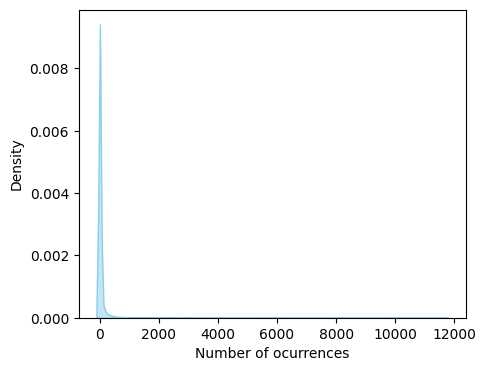

,CountUni
count,15809.000000
mean,47.355304
std,250.775073
min,1.000000
25%,1.000000
50%,2.000000
75%,11.000000
max,11700.000000


In [ ]:
# Ditribution of number of ocurrences for each unigram
plt.figure(figsize=(5,4))
sns.kdeplot(totalCountUni.tolist()[0], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Number of ocurrences')
plt.ylabel('Density')
plt.show()
pd.DataFrame(totalCountUni.T, columns=['CountUni']).describe()

In [ ]:
# Train word2vec model
w2v_model = Word2Vec(min_count=5,
                     window=2,
                     vector_size=30,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20
                     )

In [ ]:
# Create vocabulary
sent = [row.split() for row in df['reviewTextProc']]
w2v_model.build_vocab(sent, progress_per=10000)
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.key_to_index)))

Vocabulario compuesto por 5983 palabras


In [ ]:
# Train model
w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(9784385, 22383750)

In [ ]:
# Top10 words most similar to selected words
words = ['squirrel','fruit','grill','tree']
top10words = w2v_model.wv.most_similar(positive=words)
top10words

[('persimmon', 0.8045294880867004),
 ('pecan', 0.760225772857666),
 ('pear', 0.7511135935783386),
 ('graze', 0.7150291204452515),
 ('domin', 0.7132003307342529),
 ('peach', 0.7120025753974915),
 ('fig', 0.7073871493339539),
 ('ripe', 0.7038217782974243),
 ('rhododendron', 0.6979893445968628),
 ('myrtl', 0.6952107548713684)]

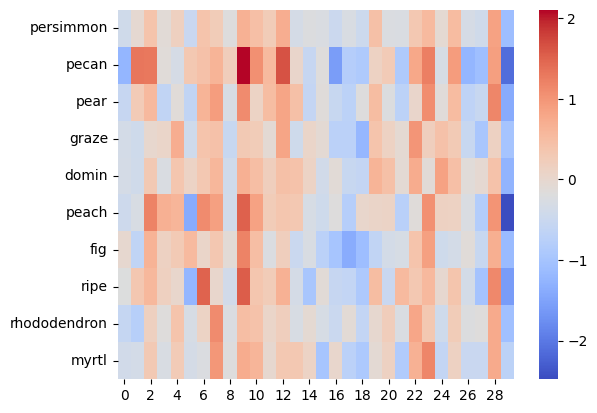

In [ ]:
# Get embeddings for top10 similar words
words = [t[0] for t in top10words]
embeddings = w2v_model.wv[words]
# Plot heatmap with embeddings
sns.heatmap(embeddings,
            cmap = "coolwarm",
            yticklabels = words
)
plt.show()

### Conclusions

The dataset is clearly imbalanced. The decision to classify levels one, two and three as negative reactions and levels four and five as positive reactions helps mitigate some of this imbalance in sample distribution. This must be taken into account when analyzing the results.

Several preprocessing steps were applied, significantly reducing the vocabulary size (approximately 16,000 terms). Among the most frequent unigrams are common words like 'use', 'work', and 'product', as well as numbers like 'one' and 'two'. The most frequent bigrams include sentiment-indicating phrases such as 'work well', 'work great', and 'easi use'.

The distribution of unigrams per review shows:

- Some reviews contain only one word, while others exceed 1,100 words.

- Most unigrams appear very few times—only a small fraction occur more than 20 times.

A Word2Vec model was trained on the review texts. Words appearing fewer than five times were filtered out, reducing the vocabulary to 5,983 words. The embeddings were configured to a 30-dimensional space.

The ten most similar words to 'squirrel', 'fruit', 'grill', and 'tree' were identified. Their embeddings were visualized in a heatmap, revealing semantic similarity in coordinates 7, 9, 10, 28, and 29.
